<a href="https://colab.research.google.com/github/ansehoon1999/pytorch_practice/blob/main/pytorch_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#initialization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

if torch.cuda.is_available() :
  DEVICE = torch.device('cuda')
else :
  DEVICE = torch.device('cpu')

print('Using PyTorch version: ', torch.__version__, 'Device: ', DEVICE)

Using PyTorch version:  1.10.0+cu111 Device:  cpu


#data 확인

In [ ]:
BATCH_SIZE = 32
EPOCHS = 10

train_dataset = datasets.MNIST(root = "../data/MNIST", train = True, download = True, transform = transforms.ToTensor())
test_dataset = datasets.MNIST(root= "../data/MNIST", train= False, transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = BATCH_SIZE, shuffle = True)
test_loader= torch.utils.data.DataLoader(dataset = test_dataset, batch_size = BATCH_SIZE, shuffle = False)


X_train:  torch.Size([32, 1, 28, 28]) type:  torch.FloatTensor
Y_train:  torch.Size([32]) type:  torch.LongTensor


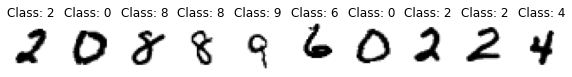

In [ ]:
for (X_train, y_train) in train_loader :
  print('X_train: ', X_train.size(), 'type: ', X_train.type())
  print('Y_train: ', y_train.size(), 'type: ', y_train.type())
  break

pltsize = 1
plt.figure(figsize = (10 * pltsize, pltsize))
for i in range(10) :
  plt.subplot(1, 10, i+1)
  plt.axis('off')
  plt.imshow(X_train[i, :, :, :].numpy().reshape(28, 28), cmap = "gray_r")
  plt.title('Class: '+ str(y_train[i].item()))

  

#모델 설계

In [ ]:
class Net(nn.Module) :
  def __init__ (self) :
    super(Net, self).__init__()
    self.fc1 = nn.Linear(28 * 28, 512)
    self.fc2 = nn.Linear(512, 256)
    self.fc3 = nn.Linear(256, 10)
    self.dropout_prob = 0.5
    self.batch_norm1 = nn.BatchNorm1d(512)
    self.batch_norm2 = nn.BatchNorm1d(256)

  def forward(self, x) :
    x = x.view(-1, 28 * 28)
    x = self.fc1(x)
    x = self.batch_norma1(x)
    x = F.relu(x)
    x = F.dropout(x, training = self.training, p = self.dropout_prob)
    x = self.fc2(x)
    x = self.batch_norm2(x)
    x = F.relu(x)
    x = F.dropout(x, training = self.training, p = self.dropout_prob)
    x = self.fc3(x)
    x = F.log_softmax(x, dim=1) #마지막으로 0~10 값을 출력하는데 원활하게 하기 위해서 log 함수 그래프를 이용한다.

    return x



In [ ]:
import torch.nn.init as init
def weight_init(m) :
  if isinstance(m, nn.Linear) :
    init.kaiming_uniform_(m.weight.data)
  

model = Net().to(DEVICE)
model.apply(weight_init)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)
criterion = nn.CrossEntropyLoss()

print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


#학습 및 성능 확인

In [ ]:
def train(model, train_loader, optimizer, log_interval) :
  model.train()
  for batch_idx, (image, label) in enumerate(train_loader) :
    image = image.to(DEVICE)
    label = label..to(DEVICE)
    optimizer.zero_grad()
    output = model(image)
    loss = criterion(output, labe)
    loss.backward()
    optimizer.step()
    

In [ ]:
def evaluate(model, test_loader) :
  model.eval()
  test_loss = 0
  correct = 0

  with torch.no_grad() :
    for image, label in test_loader :
      image


In [ ]:
def train(model, train_loader, optimizer, log_interval):
    model.train()
    for batch_idx, (image, label) in enumerate(train_loader):
        image = image.to(DEVICE)
        label = label.to(DEVICE)
        optimizer.zero_grad()
        output = model(image)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()

        if batch_idx % log_interval == 0:
            print("Train Epoch: {} [{}/{} ({:.0f}%)]\tTrain Loss: {:.6f}".format(
                epoch, batch_idx * len(image), 
                len(train_loader.dataset), 100. * batch_idx / len(train_loader), 
                loss.item()))
            

In [ ]:
def evaluate(model, test_loader) :
  model.eva()
  test_loss = 0
  correct = 0

  with no_grad() :
    for image, label in test_loader :
      image = image.to(DEVICE)
      label = label.to(DEVICE)
      output = model(image)
      test_loss += criterion(output, label).item()
      prediction = output.max(1, keep_dim = True)[1]
      correct += prediction.eq(label.view_as(prediction)).sum().item()
    
    test_loss /= (len(test_loader.dataset)/BATCH_SIZE)
    test_accuarcy = 100 * correct / (len(test_loader.dataset))

In [ ]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for image, label in test_loader:
            image = image.to(DEVICE)
            label = label.to(DEVICE)
            output = model(image)
            test_loss += criterion(output, label).item()
            prediction = output.max(1, keepdim = True)[1]
            correct += prediction.eq(label.view_as(prediction)).sum().item()
    
    test_loss /= (len(test_loader.dataset) / BATCH_SIZE)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

In [ ]:
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, test_loss, test_accuracy))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Train Epoch: 1 [0/60000 (0%)]	Train Loss: 2.324343
Train Epoch: 1 [6400/60000 (11%)]	Train Loss: 2.242311
Train Epoch: 1 [12800/60000 (21%)]	Train Loss: 2.289017
Train Epoch: 1 [19200/60000 (32%)]	Train Loss: 2.312981
Train Epoch: 1 [25600/60000 (43%)]	Train Loss: 2.305590
Train Epoch: 1 [32000/60000 (53%)]	Train Loss: 2.290631
Train Epoch: 1 [38400/60000 (64%)]	Train Loss: 2.312973
Train Epoch: 1 [44800/60000 (75%)]	Train Loss: 2.270411
Train Epoch: 1 [51200/60000 (85%)]	Train Loss: 2.265192
Train Epoch: 1 [57600/60000 (96%)]	Train Loss: 2.266425

[EPOCH: 1], 	Test Loss: 2.2373, 	Test Accuracy: 11.98 % 

Train Epoch: 2 [0/60000 (0%)]	Train Loss: 2.248059
Train Epoch: 2 [6400/60000 (11%)]	Train Loss: 2.226496
Train Epoch: 2 [12800/60000 (21%)]	Train Loss: 2.146372
Train Epoch: 2 [19200/60000 (32%)]	Train Loss: 2.144383
Train Epoch: 2 [25600/60000 (43%)]	Train Loss: 1.979455
Train Epoch: 2 [32000/60000 (53%)]	Train Loss: 1.914823
Train Epoch: 2 [38400/60000 (64%)]	Train Loss: 1.797449
T